# Project 1: Placement Prediction
Data_Science_Hack

---

### Context

The probability of the placement depends on various factors like CGPA, Internships, projects, etc. Change in the mindset of the millennial generation also contributes to ups and down in placement as the young generation is much into cloud Nine  than to owe a placement. Predicting the right questions for the placement is important for aspiring engineers in the corporate business. This makes it very important to come up with proper and smart technique to estimate the true prediction of the placement. 
 

---

---

### Problem Statement


You are willing to get your placement stats. You are not sure about the placement of yours and want to estimate your placement stats. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your placement prediction. 

---

### Data Description

The **placement** dataset contains the prices and other attributes. There are $2967$ rows and $18$ attributes (features) with a target column (Age). 

Following are the features:  

|Column|Description|
|---:|
Age	
Internships	
CGPA	
HistoryOfBacklogs	
teamWorking	
problemSolvingskills	
techSkillsLevel	
comSkillsLevel	
resumeLevel	
projectsNo	
easyProjects	
mediumProjects	
hardProjects	
advancedProjects	
personalityLevel	
winnerNo	
runnerNo	
participantNo
  **Dataset Link:**  https://docs.google.com/spreadsheets/d/e/2PACX-1vSVwkDCMjC3YqMd3-aGNIB5gGrUhguSyWGTt6G5_mBuDZ6UcwsCDPRUyLnTVBtp4l8bksEJIXHj0qWL/pub?output=csv

---

### Things To Do

1. Explore the placement dataset by creating the following plots:
   - Box plots between each categorical feature and the `Age`.
   - Scatter plots between the numerical features and the `Age`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the Age of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

**Dataset Link:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSVwkDCMjC3YqMd3-aGNIB5gGrUhguSyWGTt6G5_mBuDZ6UcwsCDPRUyLnTVBtp4l8bksEJIXHj0qWL/pub?output=csv








In [ ]:
# Import the required modules and load the dataset.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSVwkDCMjC3YqMd3-aGNIB5gGrUhguSyWGTt6G5_mBuDZ6UcwsCDPRUyLnTVBtp4l8bksEJIXHj0qWL/pub?output=csv')
df
df.head()

,Age,Internships,CGPA,HistoryOfBacklogs,teamWorking,problemSolvingskills,techSkillsLevel,comSkillsLevel,resumeLevel,easyProjects,mediumProjects,hardProjects,advancedProjects,personalityLevel,winnerNo,runnerNo,participantNo
0,22,1,9.86,0,1,1,7,8,8,2,1,2,1,4,0,1,2
1,22,0,6.45,0,9,9,0,7,4,4,1,0,0,10,3,3,3
2,22,0,7.60,0,4,7,7,8,4,4,4,4,2,6,2,2,5
3,21,1,8.86,0,3,7,3,9,8,1,0,4,4,5,2,2,1
4,21,2,6.34,0,1,5,0,7,4,2,0,1,4,1,2,4,1


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2966 non-null   int64  
 1   Internships           2966 non-null   int64  
 2   CGPA                  2966 non-null   float64
 3   HistoryOfBacklogs     2966 non-null   int64  
 4   teamWorking           2966 non-null   int64  
 5   problemSolvingskills  2966 non-null   int64  
 6   techSkillsLevel       2966 non-null   int64  
 7   comSkillsLevel        2966 non-null   int64  
 8   resumeLevel           2966 non-null   int64  
 9   easyProjects          2966 non-null   int64  
 10  mediumProjects        2966 non-null   int64  
 11  hardProjects          2966 non-null   int64  
 12  advancedProjects      2966 non-null   int64  
 13  personalityLevel      2966 non-null   int64  
 14  winnerNo              2966 non-null   int64  
 15  runnerNo             

In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

Age                     0
Internships             0
CGPA                    0
HistoryOfBacklogs       0
teamWorking             0
problemSolvingskills    0
techSkillsLevel         0
comSkillsLevel          0
resumeLevel             0
easyProjects            0
mediumProjects          0
hardProjects            0
advancedProjects        0
personalityLevel        0
winnerNo                0
runnerNo                0
participantNo           0
dtype: int64

In [ ]:
features = list(df.columns.values)
features.remove('Age')
features

['Internships',
 'CGPA',
 'HistoryOfBacklogs',
 'teamWorking',
 'problemSolvingskills',
 'techSkillsLevel',
 'comSkillsLevel',
 'resumeLevel',
 'easyProjects',
 'mediumProjects',
 'hardProjects',
 'advancedProjects',
 'personalityLevel',
 'winnerNo',
 'runnerNo',
 'participantNo']

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


In [ ]:
# Check categorical attributes
from sklearn.model_selection import train_test_split
X=df[features]
y=df['Age']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=29)

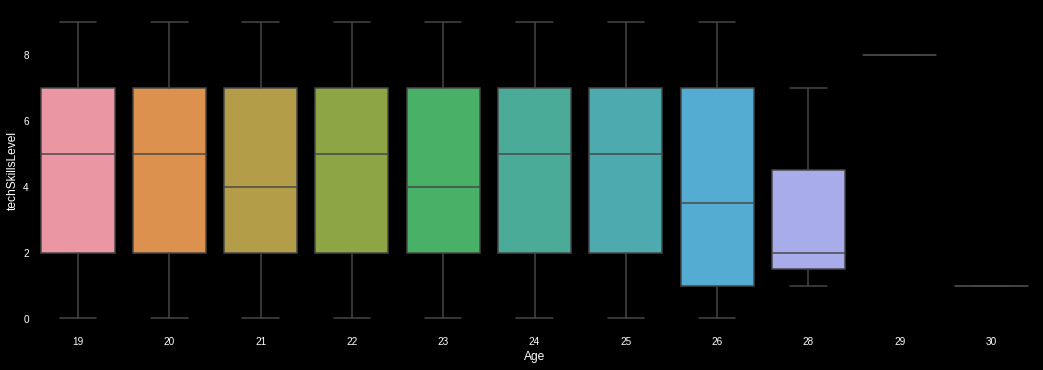

In [ ]:
# Boxplot for 'Age' vs 'techSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='Age', y='techSkillsLevel', data=df )
plt.show()

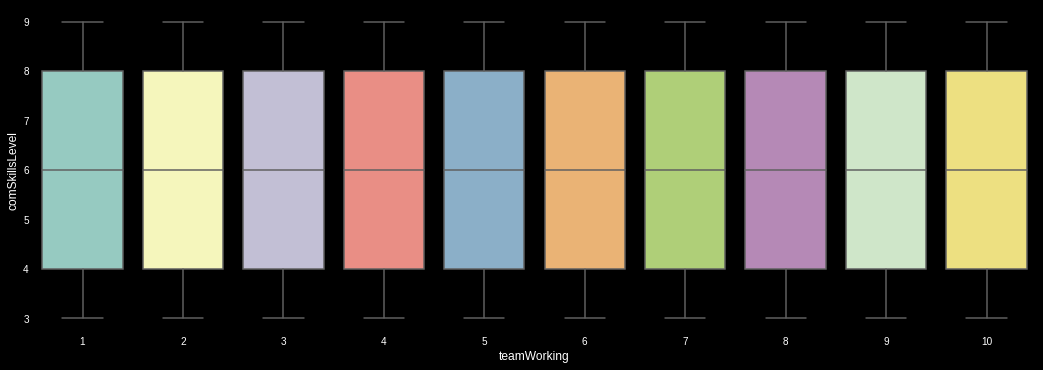

In [ ]:
# Boxplot for 'teamWorking' vs 'comSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='teamWorking', y='comSkillsLevel', data=df )
plt.show()


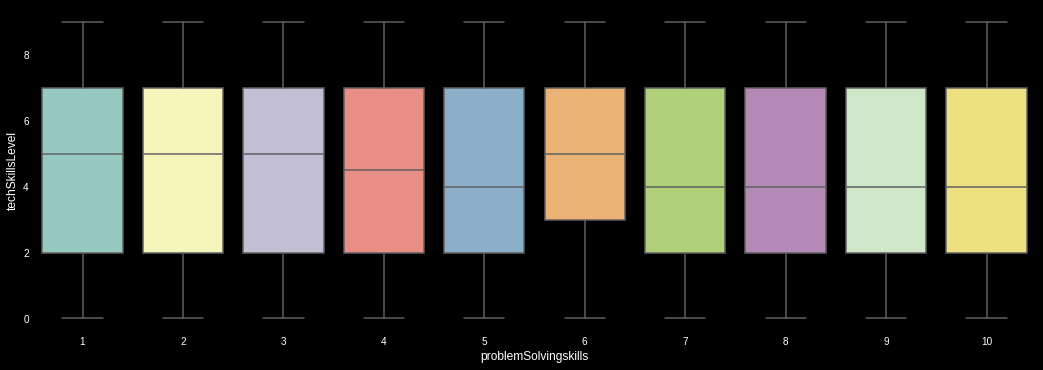

In [ ]:
# Boxplot for 'problemSolvingskills' vs 'techSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='problemSolvingskills', y='techSkillsLevel', data=df )
plt.show()

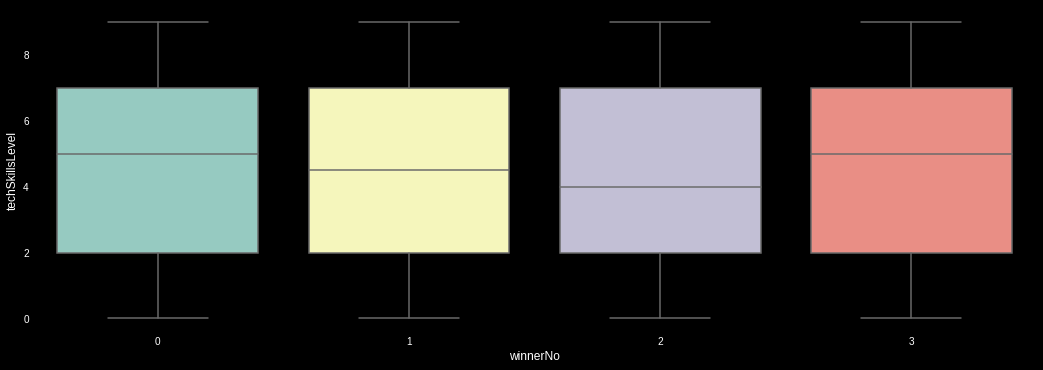

In [ ]:
# Boxplot for 'winnerNo' vs 'techSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='winnerNo', y='techSkillsLevel', data=df )
plt.show()

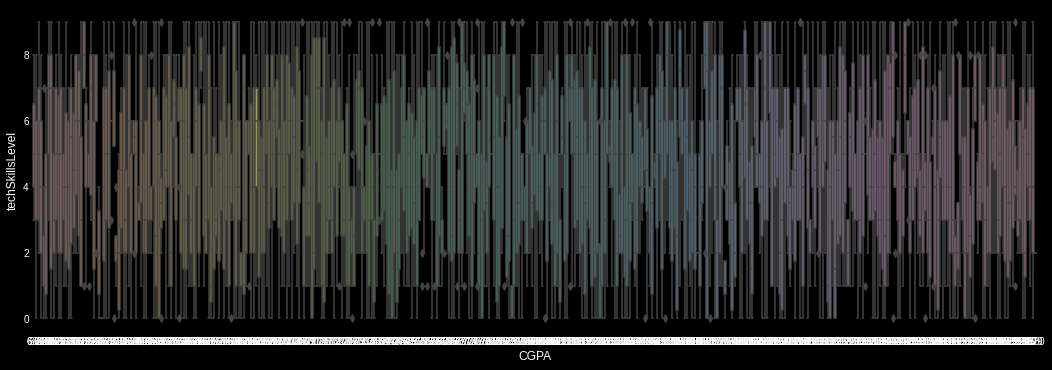

In [ ]:
# Boxplot for 'CGPA' vs 'techSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='CGPA', y='techSkillsLevel', data=df )
plt.show()


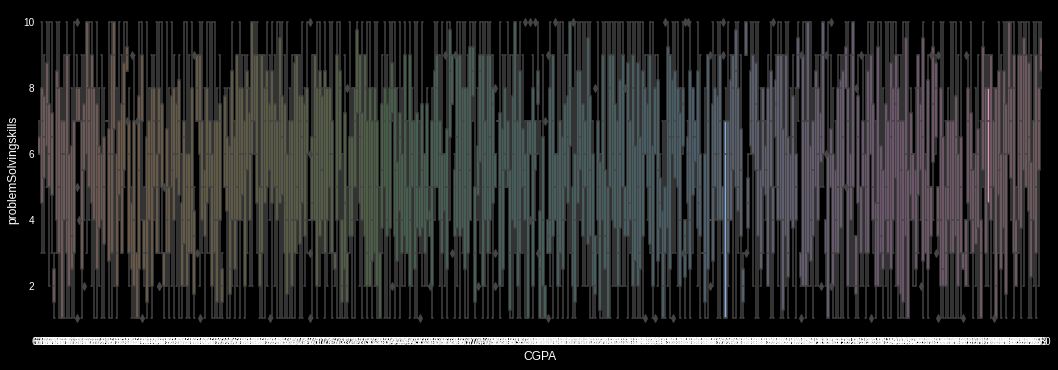

In [ ]:
# Boxplot for 'CGPA' vs 'problemSolvingskills'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='CGPA', y='problemSolvingskills', data=df )
plt.show()


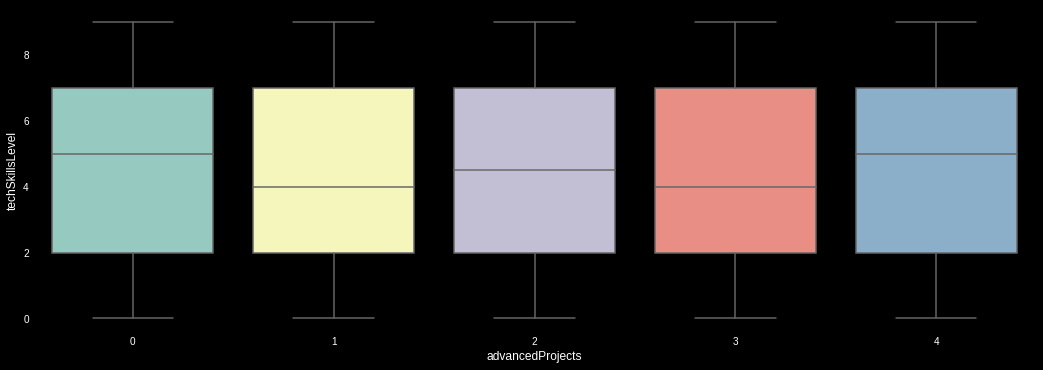

In [ ]:
# Boxplot for 'advancedProjects' vs 'techSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='advancedProjects', y='techSkillsLevel', data=df )
plt.show()


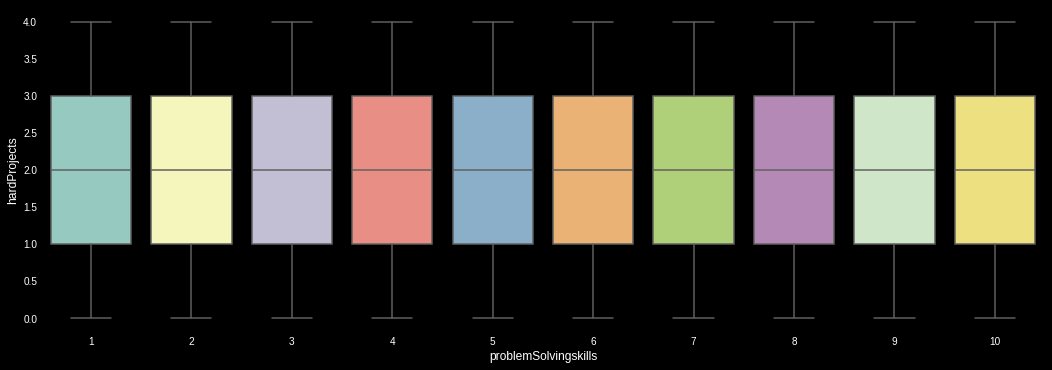

In [ ]:
# Boxplot for 'problemSolvingskills' vs 'hardProjects'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='problemSolvingskills', y='hardProjects', data=df )
plt.show()

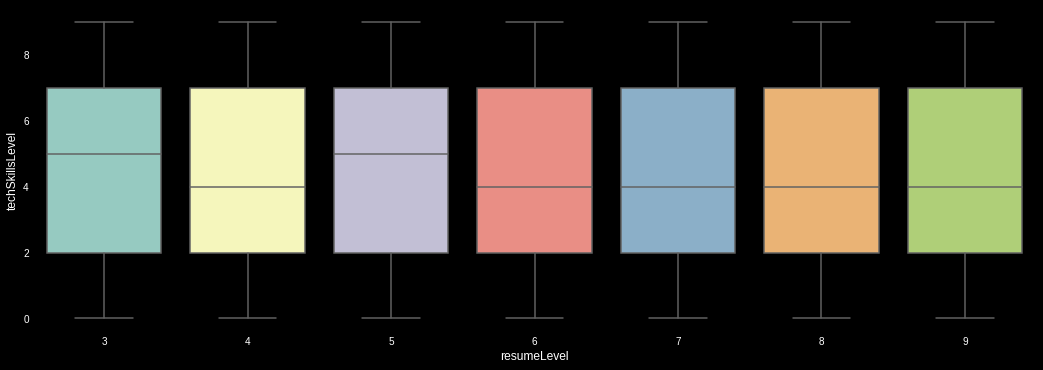

In [ ]:
# Boxplot for 'resumeLevel' vs 'techSkillsLevel'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='resumeLevel', y='techSkillsLevel', data=df )
plt.show()

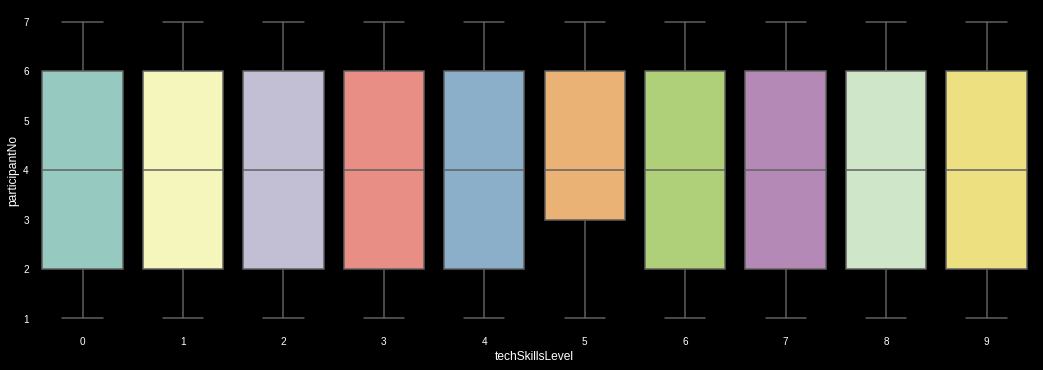

In [ ]:
# Boxplot for 'techSkillsLevel' vs 'participantNo'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='techSkillsLevel', y='participantNo', data=df )
plt.show()

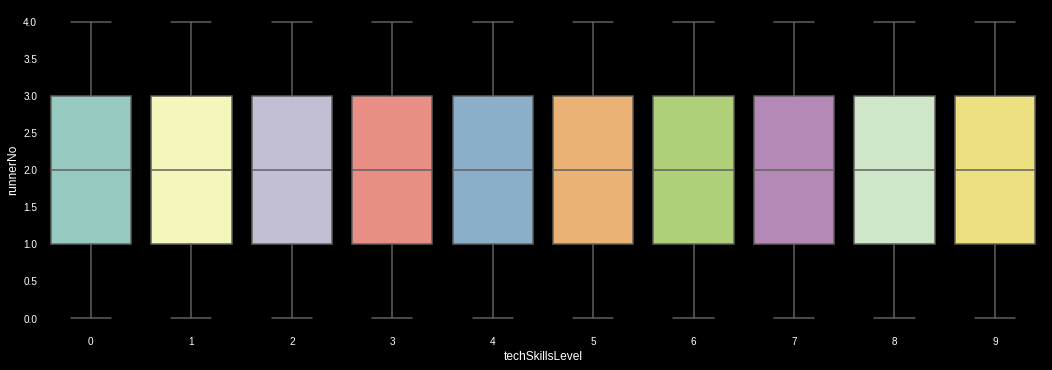

In [ ]:
# Boxplot for 'techSkillsLevel' vs 'runnerNo'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='techSkillsLevel', y='runnerNo', data=df )
plt.show()

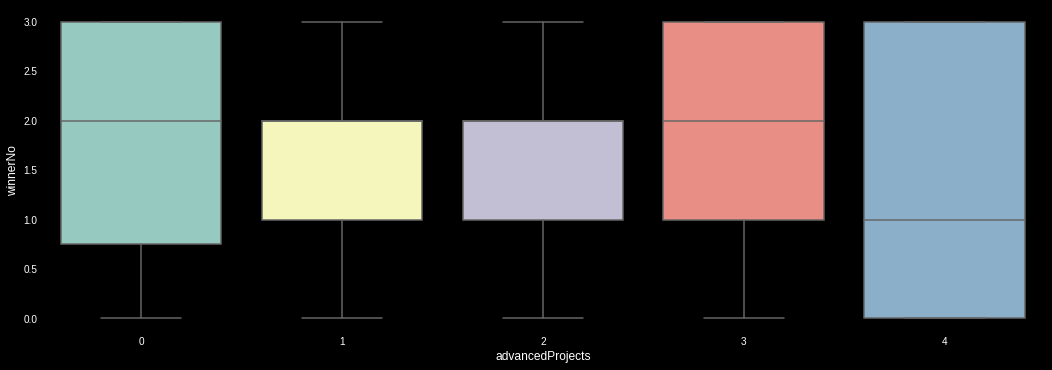

In [ ]:
# Boxplot for 'advancedProjects' vs 'winnerNo'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='advancedProjects', y='winnerNo', data=df )
plt.show()


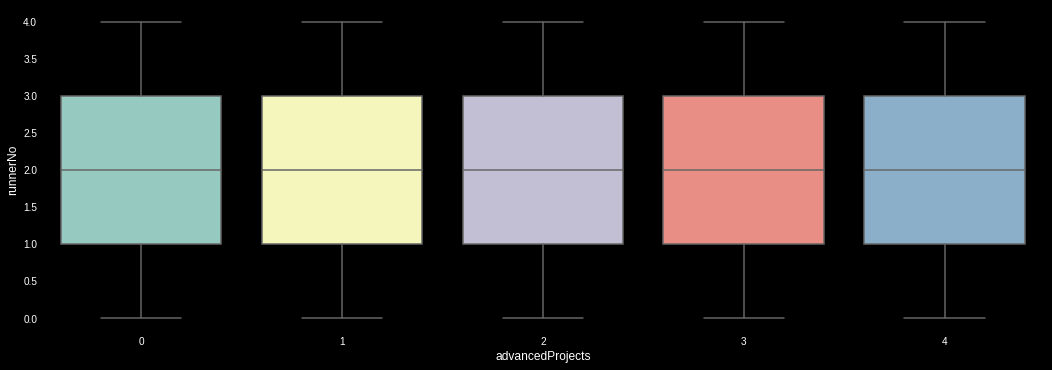

In [ ]:
# Boxplot for 'advancedProjects' vs 'runnerNo'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='advancedProjects', y='runnerNo', data=df )
plt.show()

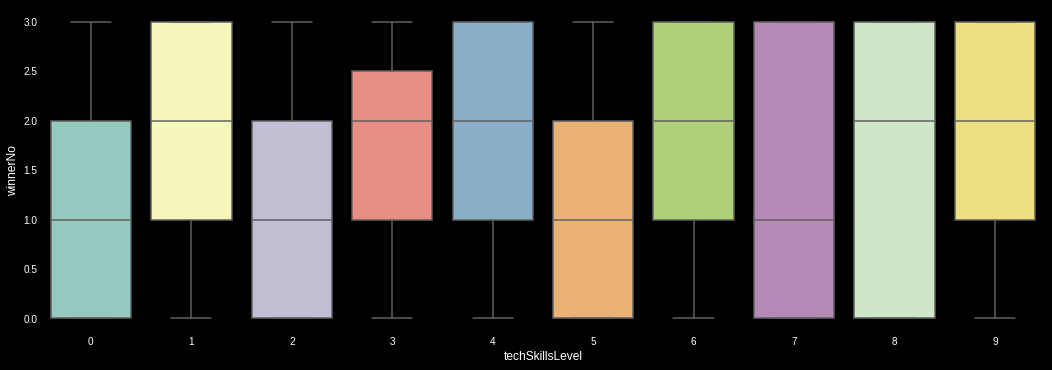

In [ ]:
# Boxplot for 'techSkillsLevel' vs 'winnerNo'
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='techSkillsLevel', y='winnerNo', data=df )
plt.show()


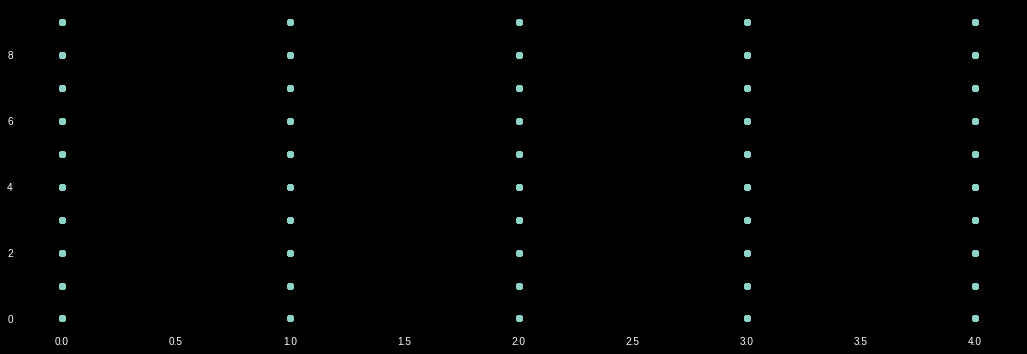

In [ ]:
#  scatter plot with 'mediumProjects' on X-axis and 'techSkillsLevel' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(x='mediumProjects', y='techSkillsLevel', data=df )
plt.show()


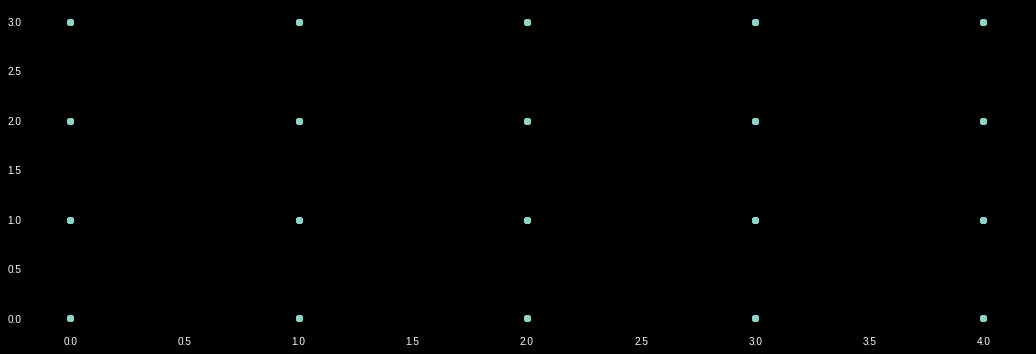

In [ ]:
#scatter plot with 'advancedProjects' on X-axis and 'winnerNo' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(x='advancedProjects', y='winnerNo', data=df )
plt.show()

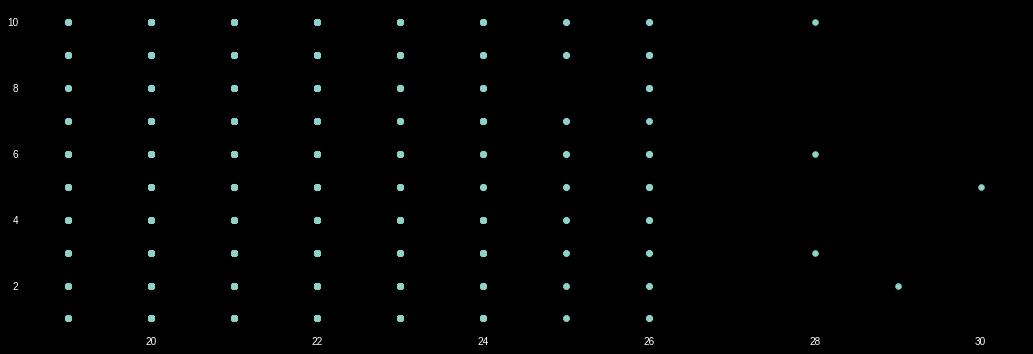

In [ ]:
#  scatter plot with 'Age' on X-axis and 'personalityLevel' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(x='Age', y='personalityLevel', data=df )
plt.show()

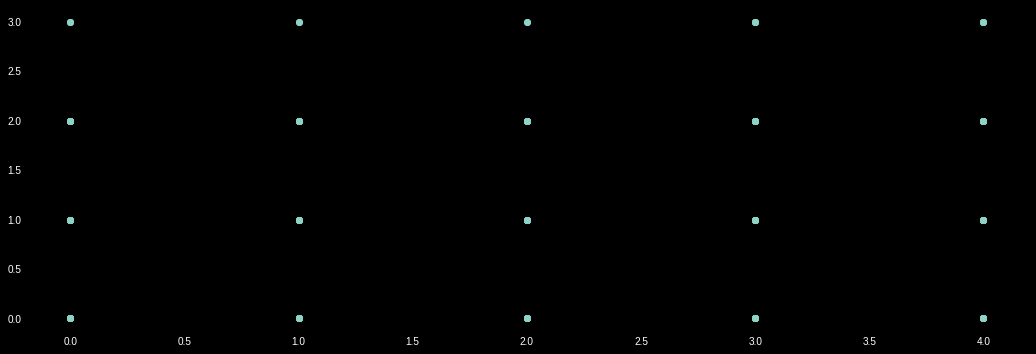

In [ ]:
#  scatter plot with 'easyProjects' on X-axis and 'Internships' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(x='easyProjects', y='Internships', data=df )
plt.show()

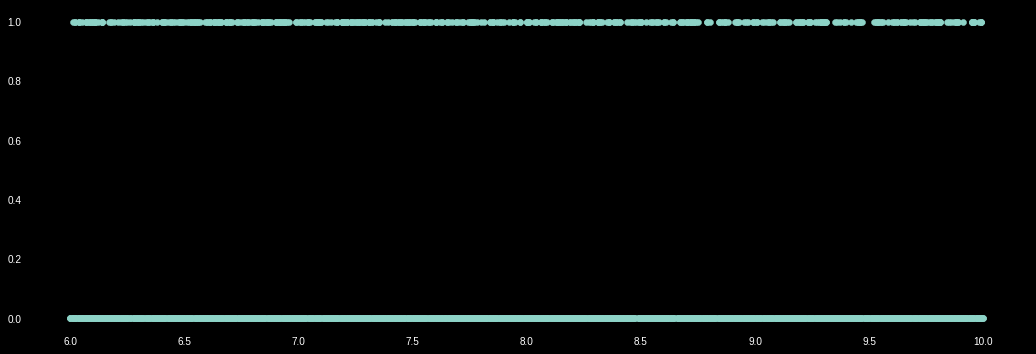

In [ ]:
# Create scatter plot with 'CGPA' on X-axis and 'HistoryOfBacklogs' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(x='CGPA', y='HistoryOfBacklogs', data=df )
plt.show()

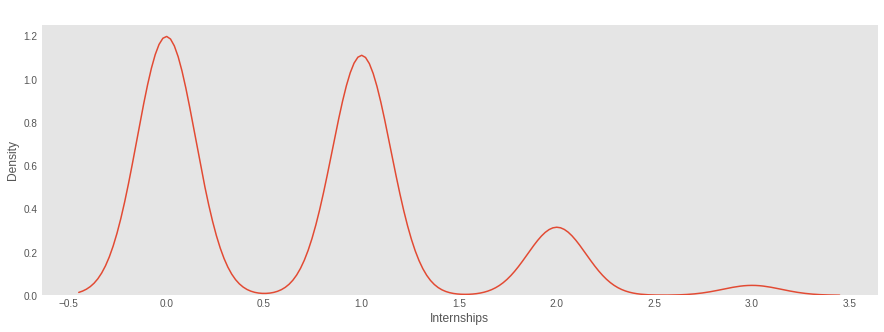

In [ ]:
# Create a normal distribution curve for the 'Internships'.
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.title('normal distribution curve for the Internships')
sns.distplot(df['Internships'],bins='sturges',hist=False)
plt.grid()
plt.show()
# Create a probablity density function for plotting the normal distribution


# Plot the normal distribution curve using plt.scatter() 


---

#### 3. Feature encoding 

Perform feature encoding using `map()` function and one-hot encoding.

---

#### 4. Model Building and Evaluation 

Build a multiple linear regression model using the `statsmodels.api` module.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)
features = list(df.columns)
features.remove('Age')



In [ ]:
#separate data-frames for the feature and target variables for both the train and test sets.
X_train = train_df[features]
y_train = train_df['Age']
X_test = test_df[features]
y_test = test_df['Age']

X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]]
X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]]

In [ ]:
# Build a linear regression model using all the features to predict prices.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()


In [ ]:
# calculate N and p-values.
num_rows = X_train.shape[0] # Number of rows or instances 
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
print("Number of rows (N):", num_rows)
print("Number of predictors (p):", num_predictors)


Number of rows (N): 2076
Number of predictors (p): 16


In [ ]:
def mean_sq_model(X, y_actual):
    y_pred = lin_reg.predict(X)
    sq_model = (y_pred - y_actual.mean()) ** 2
    msm = sq_model.sum() / (num_predictors - 1)
    return msm

def mean_sq_error(X, y_actual):
    y_pred = lin_reg.predict(X)
    sq_error = (y_actual - y_pred) ** 2
    mse = sq_error.sum() / (num_rows - num_predictors)
    return mse

In [ ]:
# Calculate the p-value
f_statistic=mean_sq_model(X_train_sm,y_train)/mean_sq_error(X_train_sm,y_train)
f_statistic


0.921806089942024

In [ ]:
from scipy.stats import norm
pvalue = (2 * (1 - norm.cdf(abs(f_statistic))))
pvalue

0.3566297303069854

In [ ]:
#Find adjusted r squared
num_rows = X_train.shape[0] # Number of rows or instances 
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
r2_score = lin_reg.rsquared # R-squared (or coefficient of determination) value 
adj_r2_score = 1 - ((1 - r2_score) * (num_rows - 1))/(num_rows - num_predictors - 1) # Adjusted R-squared calculation
adj_r2_score

-0.0010515242193878116

**Q:** What is the  adjusted r-squared value?

**A:** -0.0009


---

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [ ]:
# Build multiple linear regression model using all the features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[features]
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)


sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)



print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") 


for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 




Constant       21.711680
Internships     -0.004864
CGPA            -0.047095
HistoryOfBacklogs -0.136295
teamWorking     -0.003347
problemSolvingskills 0.005086
techSkillsLevel 0.003779
comSkillsLevel  -0.001497
resumeLevel     -0.004210
easyProjects    0.030234
mediumProjects  0.007400
hardProjects    -0.000437
advancedProjects -0.002003
personalityLevel -0.000080
winnerNo        0.047889
runnerNo        0.026624
participantNo   -0.002841


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error,mean_squared_log_error
y_train_predict = sklearn_lin_reg.predict(X_train)
y_test_predict = sklearn_lin_reg.predict(X_test)

r2_score=r2_score(y_train,y_train_predict)
mean_squared_error=mean_squared_error(y_train,y_train_predict)
mean_absolute_error=mean_absolute_error(y_train,y_train_predict)
print(r2_score,mean_squared_error,mean_absolute_error)

0.0071801192264489 1.741947615851686 0.9783803783601591


---

#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [ ]:
#  a Python dictionary storing the moderately to highly correlated features with techSkillsLevel and the corresponding correlation values.
#  correlation threshold to be 0.2
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df['techSkillsLevel'], df[f])[0, 1]
  if (corr_coef >= 0.2) or (corr_coef <= -0.2):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with techSkillsLevel =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with techSkillsLevel = 1 



{'techSkillsLevel': 0.9999999999999999}

In [ ]:
#Build multiple linear regression model using all the features selected after RFE
#Split the DataFrame into the train and test sets such that test set has 33% of the values.
#Split the DataFrame into the train and test sets such that test set has 33% of the values.

X = df[features]
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Build linear regression model using the 'sklearn.linear_model' module.

sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)



print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") 

# Print the names of the features along with the values of their corresponding coefficients.

for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 




Constant       21.711680
Internships     -0.004864
CGPA            -0.047095
HistoryOfBacklogs -0.136295
teamWorking     -0.003347
problemSolvingskills 0.005086
techSkillsLevel 0.003779
comSkillsLevel  -0.001497
resumeLevel     -0.004210
easyProjects    0.030234
mediumProjects  0.007400
hardProjects    -0.000437
advancedProjects -0.002003
personalityLevel -0.000080
winnerNo        0.047889
runnerNo        0.026624
participantNo   -0.002841


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")
      

Train Set
--------------------------------------------------
R-squared: 0.007
Mean Squared Error: 1.742
Root Mean Squared Error: 1.320
Mean Absolute Error: 0.978


---

#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

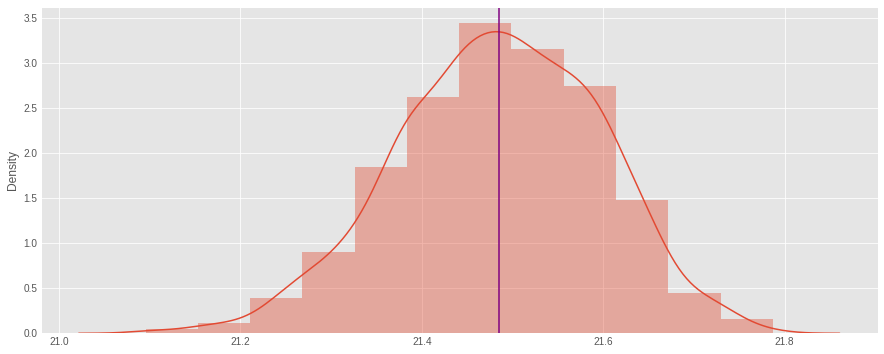

In [ ]:
# a histogram for the errors obtained in the predicted values for the train set.
train_error=y_train_pred
plt.figure(figsize=(15,6))
sns.distplot(train_error,bins='sturges')
plt.axvline(x=np.mean(train_error),color='purple')
plt.show()


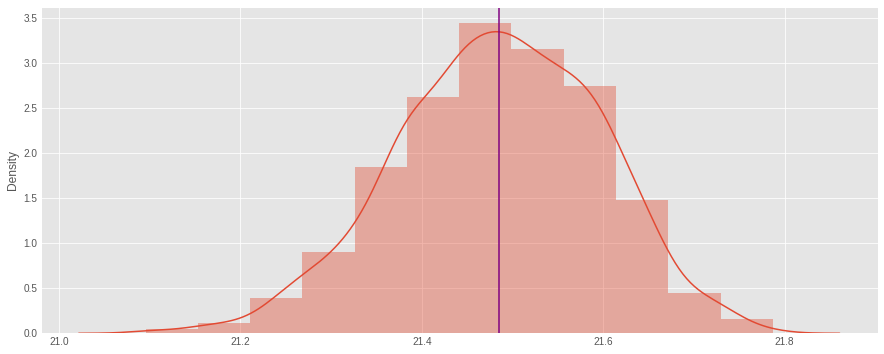

In [ ]:
#  a histogram for the errors obtained in the predicted values for the test set.
test_error=y_test_pred
plt.figure(figsize=(15,6))
sns.distplot(train_error,bins='sturges')
plt.axvline(x=np.mean(train_error),color='purple')
plt.show()


---

 8.  Homoscedasticity 

We can Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

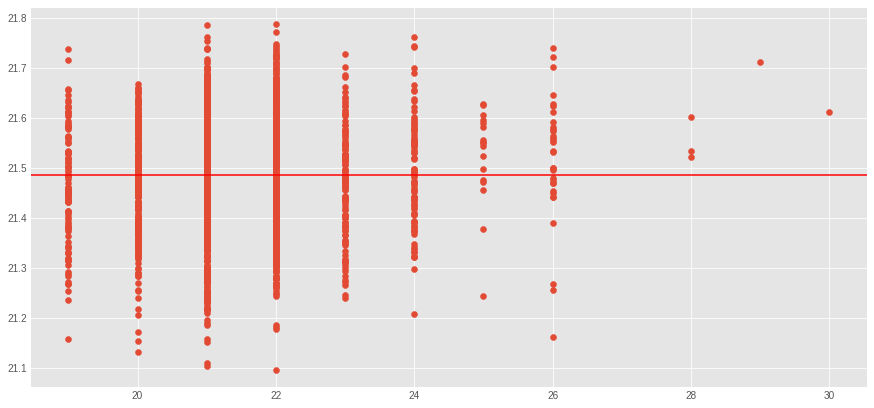

In [ ]:
#  a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(15,7))
plt.scatter(y_train,train_error)
plt.axhline(y=np.mean(train_error),color='red')
plt.show()



---

---